___


# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>

<Strong> Alumnos: </Strong>
- Marcela Quintero Pérez
- Santiago Ayon Sanchez
- Gael Rendon Mendoza

<Strong> Año </Strong>: 2025

<Strong> Email: </Strong>  
- <font color="blue"> is717644@iteso.mx </font>
- <font color="blue"> santiago.ayon@iteso.mx </font>
- <font color="blue"> gael.rendon@iteso.mx </font>

___

## Librerías

In [ ]:
# Librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.colors as pc
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from ucimlrepo import fetch_ucirepo

from collections import Counter
import time

from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, balanced_accuracy_score, confusion_matrix, classification_report)
from sklearn.model_selection import (StratifiedKFold, cross_val_predict,
                                     train_test_split, GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

colors = pc.qualitative.Plotly + pc.qualitative.D3

sns.set_theme(style="whitegrid")

seed = 123

In [2]:
# pip install imbalanced-learn

In [3]:
# pip install ucimlrepo

In [4]:
# pip install xgboost

In [5]:
# pip install lightgbm

In [6]:
# pip install catboost

## Clasificación

###  <font color= #ffffffff> Estimation of Obesity Levels Based On Eating Habits and Physical Condition </font>
url: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Se hará uso de un dataset diseñado para la estimación de los niveles de obesidad basados en los hábitos alimenticios y la condición física de personas de Colombia, Perú y México. El conjunto de datos cuenta con 17 variables y 2111 observaciones, los cuales están etiquetados con la variable objetivo NObesity que es el nivel de obesidad. Esta variable permite clasificar las observaciones en las siguientes categorías: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

Este conjunto de datos fue recopilado para estimar los niveles de obesidad en individuos de México, Perú y Colombia, basándose en sus hábitos alimenticios y condición física. El 77% de los datos fueron generados sintéticamente utilizando la herramienta Weka y la técnica SMOTE, y el 23% de los datos restantes fueron recolectados directamente de usuarios a través de una plataforma web.


### Descripción de las variables del dataset

- **Gender:** Género del individuo. Valores posibles: `Male` (Masculino), `Female` (Femenino).
- **Age:** Edad del individuo en años.
- **Height:** Altura del individuo en metros.
- **Weight** Peso del individuo en kilogramos.
- **family_history_with_overweight:** Indica si hay antecedentes familiares de sobrepeso. Valores: `yes` (Sí), `no` (No).
- **FAVC:** Frecuencia de consumo de alimentos con alto contenido calórico. Valores: `yes` (Sí), `no` (No).
- **FCVC:** Frecuencia de consumo de vegetales. Valores discretos: 1 (Bajo) a 3 (Alto).
- **NCP:** Número de comidas principales diarias. Valores discretos: 1 a 4.
- **CAEC:** Consumo de alimentos entre comidas. Valores: `no`, `Sometimes` (A veces), `Frequently` (Frecuentemente), `Always` (Siempre).
- **CH2O:** Consumo de agua diaria (litros). Valores discretos: 1 a 3.
- **SCC:** Monitoreo de las calorías consumidas diariamente. Valores: `yes` (Sí), `no` (No).
- **FAF:** Frecuencia de actividad física. Valores discretos: 0 a 3.
- **TUE:** Tiempo de exposición a pantallas (televisión, computadora, videojuegos). Valores discretos: 0 a 3.
- **CALC:** Consumo de alcohol. Valores: `yes` (Sí), `no` (No).
- **SMOKE:** Consumo de tabaco. Valores: `yes` (Sí), `no` (No).
- **MTRANS:** Medio de transporte habitual. Valores: `Public_Transportation` (Transporte público), `Automobile` (Automóvil), `Walking` (Caminando), `Motorbike` (Motocicleta), `Bike` (Bicicleta).
- **NObeyesdad (target):** Nivel de obesidad del individuo (variable objetivo). 
    Valores:  
  - `Insufficient_Weight` (Peso insuficiente)  
  - `Normal_Weight` (Peso normal)  
  - `Overweight_Level_I` (Sobrepeso Nivel I)  
  - `Overweight_Level_II` (Sobrepeso Nivel II)  
  - `Obesity_Type_I` (Obesidad Tipo I)  
  - `Obesity_Type_II` (Obesidad Tipo II)  
  - `Obesity_Type_III` (Obesidad Tipo III)

In [7]:
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 

### EDA

In [8]:
# Combinar en un solo DataFrame
df_clasificacion = pd.concat([X, y], axis=1)
df_clasificacion_copy = df_clasificacion.copy()

df_clasificacion.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


El conjunto de datos cuenta con 17 variables y 2111 observaciones, los cuales están etiquetados con la variable objetivo NObesity que es el nivel de obesidad.

In [9]:
print("Dimensiones del dataset:", df_clasificacion.shape)

print("\nInfo del dataset:")
print(df_clasificacion.info())

Dimensiones del dataset: (2111, 17)

Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non

El dataset no presenta valores nulos en ninguna columna, por lo que no es necesario realizar imputación de datos. Sin embargo, sí contiene registros duplicados, los cuales se procederán a eliminar.

In [10]:
# Revisar valores nulos y duplicados
print("\nValores nulos por columna:")
print(df_clasificacion.isnull().sum())

print("\nNúmero de registros duplicados:", df_clasificacion.duplicated().sum())
df = df_clasificacion.drop_duplicates()


Valores nulos por columna:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Número de registros duplicados: 24


In [11]:
print("\nEstadísticas descriptivas:")
df_clasificacion.describe().T


Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


A continuación se procede a analizar la distribución del target `NObeyesdad`, con el fin de comprender el balance entre las clases y evaluar posibles implicaciones para el modelado.

In [12]:
df_counts = df_clasificacion["NObeyesdad"].value_counts()

fig = px.bar( 
    x=df_counts.index, 
    y=df_counts.values, 
    labels={"x": "Categoría", "y": "Frecuencia"}, 
    title="Distribución de NObeyesdad"
)

fig.show()

Se puede observar que el target `NObeyesdad` tiene una distribución bastante equilibrada entre sus 7 clases. Las frecuencias oscilan entre 272 y 351 registros por clase, lo que indica que no existe un problema de desbalance significativo. Las categorías relacionadas con obesidad (Type I, II y III) son ligeramente más frecuentes, superando el 50% del total, mientras que las clases de peso normal e insuficiente también están bien representadas.

Ahora para las columnas categóricas del conjunto de datos se procederá a convertirlas al tipo de dato category con el fin de optimizar su almacenamiento y facilitar su tratamiento durante el análisis exploratorio y el modelado. Esta conversión permitirá manejar estas variables de manera más adecuada, diferenciando explícitamente los valores categóricos sin modificar aún su codificación.

In [13]:
cat_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in cat_cols:
    df_clasificacion[col] = df_clasificacion[col].astype('category')

In [14]:
categorical_cols = df_clasificacion.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_clasificacion.select_dtypes(include=['float64', 'int64']).columns.tolist()

categorical_cols.remove('NObeyesdad')

Para las variables numéricas, se procede a analizar su comportamiento respecto al target `NObeyesdad`:

In [15]:
for i, var in enumerate(numerical_cols):
    color = colors[i]

    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"{var} vs NObeyesdad", f"Distribución de {var}"))

    scatter = go.Scatter(x=df_clasificacion[var], y=df_clasificacion["NObeyesdad"], mode="markers", marker=dict(color=color, opacity=0.6), name=f"{var} vs NObeyesdad")
    fig.add_trace(scatter, row=1, col=1)

    hist = go.Histogram(x=df_clasificacion[var], marker_color=color, name=f"Distribución de {var}")
    fig.add_trace(hist, row=1, col=2)

    fig.update_layout(title_text=f"Análisis de {var}", title_font=dict(size=20, family="Arial", color="black"), title_x=0.5, showlegend=False)

    fig.show()

En los gráficos anteriores se pudo observar lo siguiente:

- **Age:**

    - La mayoría de los registros corresponden a personas jóvenes, con una mediana de 22.8 años y un rango de 14 a 61 años.
    - El 50% central de los datos se encuentra entre aproximadamente 20 y 26 años, lo que indica que la distribución está concentrada en edades jóvenes.

- **Height**:

    - La altura varía entre 1.45 y 1.98 m, con una mediana de 1.70 m.
    - Los datos están bastante concentrados, sin valores extremos, mostrando una distribución relativamente uniforme.

- **Weight**:

    - El peso varía ampliamente, desde 39 hasta 173 kg, con una mediana de 83 kg.
    - El rango intercuartílico indica que la mayoría de los registros se encuentra entre 65 y 107 kg, pero existen valores extremos que podrían considerarse outliers.

<!-- `Insight: Recomendable normalizar o estandarizar esta variable para análisis que dependan de la escala, y revisar valores atípicos antes de modelar.` -->

- **FCVC, NCP, CH2O, FAF, TUE:**

    - Estas variables muestran rangos limitados (1–4 o 1–3) y medianas cercanas al valor central, indicando que la mayoría de los registros se agrupan alrededor de ciertos valores.

<!-- `Insight: Pueden tratarse como variables ordinales o continuas según el modelo que se vaya a utilizar para clasificar.` -->

El dataset contiene variables con suficiente información para construir un modelo de clasificación, destacando `Height`, `Weight` y `Age` como las más relevantes. Las demás variables pueden ser complementarias, especialmente si se consideran hábitos y comportamientos, pero algunas requieren manejo del desbalance para ser útiles en predicciones.

Ahora se procede a analizar el comportamiento de las variables categóricas respecto al target `NObeyesdad`:

In [16]:
for i, col in enumerate(categorical_cols):
    color = colors[i]

    counts = df_clasificacion[col].value_counts().reset_index()
    counts.columns = [col, "count"]

    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"{col} vs NObeyesdad", f"Frecuencia de {col}"))

    fig_box = px.box(df_clasificacion, x=col, y="NObeyesdad", points="all", color_discrete_sequence=[color])
    for trace in fig_box.data: fig.add_trace(trace, row=1, col=1)

    fig_count = px.bar(counts, x=col, y="count", text="count", color_discrete_sequence=[color])
    for trace in fig_count.data:
        fig.add_trace(trace, row=1, col=2)

    fig.update_layout(title_text=f"Análisis de {col}", title_font=dict(size=20, family="Arial", color="black"), title_x=0.5, showlegend=False)

    fig.show()

En los gráficos anteriores se pudo observar lo siguiente:

- **Gender:**
    - La distribución entre hombres (50.6%) y mujeres (49.4%) es prácticamente equilibrada.

- **CAEC:**
    - La mayoría de los registros corresponden a "Sometimes" (83.6%), mientras que "Frequently" (11.5%), "Always" (2.5%) y "no" (2.4%) son mucho menos frecuentes.

<!-- `Insight: Existe un desbalance importante entre categorías; podría considerarse agrupar "Frequently" y "Always" en una sola categoría para análisis o modelado.` -->

- **CALC:**
    - La categoría "Sometimes" concentra 66.4% de los registros, "no" 30.3%, mientras que "Frequently" (3.3%) y "Always" (0.05%) son muy escasas.
    - Muestra patrones significativos por clase de obesidad, el uso del automóvil esta sobrerrepresentrado en 'Obesity Type I' y 'Obesity Type II', caminar y bicicleta están más asociados a 'Normal Weight'.

<!-- `Insight: Similar a CAEC, las categorías poco frecuentes podrían agruparse para reducir desbalance.` -->

- **MTRANS:**
    - La mayoría utiliza transporte público (74.8%) o automóvil (21.6%). Otras categorías (Walking, Motorbike, Bike) son muy minoritarias.

<!-- `Insight: Podría agruparse el grupo minoritario como "Otros" para simplificar el análisis y evitar desbalance.`  -->

- **family_history_with_overweight, FAVC:**

    - family_history_with_overweight y FAVC presentan una alta concentración en 'yes'.

- **SMOKE, SCC:**

    - SMOKE y SCC tienen una concentración mayoritaria en 'no', no aportan información útil al modelo.

<!-- `Insight: Las variables binarias con una gran concentración en un solo valor pueden no aportar suficiente información en modelos de clasificación; se podrían considerar técnicas de balanceo o ponderación, o bien considerar eliminarlas.` -->

Se pudo observar que de este grupo de variables, `Gender` es la única balanceada y que se pudiera considerar directamente útil para el análisis y modelado.

Las variables relacionadas con hábitos (CAEC, CALC, MTRANS) presentan desbalance fuerte en algunas categorías; en general es recomendable agrupar las categorías menos frecuentes para simplificar el análisis y mejorar la calidad del modelo en un futuro.

En general, estas variables categóricas aportan información valiosa sobre hábitos y características de los individuos, que complementan a las variables numéricas en la clasificación de sobrepeso y obesidad.

In [17]:
# df_clasificacion.corr(numeric_only=True)

### Preprocesamiento

Para garantizar que los datos estén en un formato adecuado para el modelado de clasificación, se realizará un proceso de preprocesamiento integral que busca estandarizar, codificar y escalar las variables relevantes del conjunto de datos.

In [18]:
def preprocess_dataset(df_clasificacion, test_size=0.2, random_state=42):
    """
    Preprocesamiento profesional sin data leakage:

    - Elimina SMOKE (altamente desbalanceada)
    - Agrupa MTRANS → {Public_Transportation, Automobile, Others}
    - Agrupa CAEC y CALC → {0=no, 1=sometimes, 2=frequently/always}
    - Mapea binarias a 0/1
    - Aplica LabelEncoder al target
    - Hace train/test SPLIT antes del pipeline (correcto)
    - Escala numéricas + OneHotEncode a categóricas
    - Devuelve datos transformados + pipeline
    """

    df = df_clasificacion.copy()

    # ============================================================
    # 1. ELIMINAR VARIABLES IRRELEVANTES O EXTREMAMENTE SKEWED
    # ============================================================
    drop_vars = ["SMOKE"]   # 98% una sola categoría
    df = df.drop(columns=drop_vars, errors="ignore")

    # ============================================================
    # 2. AGRUPAR MTRANS (3 categorías)
    # ============================================================
    df["MTRANS"] = df["MTRANS"].replace({
        "Public_Transportation": "Public_Transportation",
        "Automobile": "Automobile",
        "Walking": "Others",
        "Bike": "Others",
        "Motorbike": "Others"
    })

    # ============================================================
    # 3. AGRUPAR CAEC y CALC (3 niveles ordinales)
    # ============================================================
    ordinal_map = {
        "no": 0,
        "Sometimes": 1,
        "Frequently": 2,
        "Always": 2
    }

    for col in ["CAEC", "CALC"]:
        df[col] = df[col].map(ordinal_map)

    # ============================================================
    # 4. MAPEO DE VARIABLES BINARIAS
    # ============================================================
    binary_maps = {
        'family_history_with_overweight': {'no': 0, 'yes': 1},
        'FAVC': {'no': 0, 'yes': 1},
        'SCC': {'no': 0, 'yes': 1},
        'Gender': {'Female': 0, 'Male': 1}
    }

    for col, mapping in binary_maps.items():
        if col in df:
            df[col] = df[col].map(mapping)

    # ============================================================
    # 5. LABEL ENCODE TARGET (ANTES DEL SPLIT)
    # ============================================================
    le = LabelEncoder()
    df["target"] = le.fit_transform(df["NObeyesdad"])

    # Variables finales
    X = df.drop(columns=["NObeyesdad", "target"])
    y = df["target"]

    # ============================================================
    # 6. TRAIN/TEST SPLIT (CORRECTO → NO LEAKAGE)
    # ============================================================
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # ============================================================
    # 7. IDENTIFICAR TIPOS DE VARIABLES
    # ============================================================
    numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
    categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

    # ============================================================
    # 8. PIPELINE DE PREPROCESAMIENTO
    # ============================================================
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numeric_cols),
            ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
        ],
        remainder="passthrough"
    )

    pipeline = Pipeline([("preprocessor", preprocessor)])

    # Ajustar SOLO con X_train
    X_train_t = pipeline.fit_transform(X_train)
    X_test_t = pipeline.transform(X_test)

    # ============================================================
    # 9. NOMBRES DE FEATURES RESULTANTES
    # ============================================================
    def get_feature_names(ct):
        names = []
        for name, trans, cols in ct.transformers_:
            if name == "num":
                names.extend(cols)
            elif name == "cat":
                names.extend(trans.get_feature_names_out(cols))
        return names

    feature_names = get_feature_names(preprocessor)

    # Convertir a DataFrame
    X_train_t = pd.DataFrame(X_train_t, columns=feature_names, index=X_train.index)
    X_test_t = pd.DataFrame(X_test_t, columns=feature_names, index=X_test.index)

    return {
        "X_train": X_train_t,
        "X_test": X_test_t,
        "y_train": y_train,
        "y_test": y_test,
        "pipeline": pipeline,
        "label_encoder": le,
        "numeric_cols": numeric_cols,
        "categorical_cols": categorical_cols,
        "feature_names": feature_names
    }


In [19]:
Preprocesamiento = preprocess_dataset(df_clasificacion)

A continuación se describen los pasos aplicados:

- **Mapeo de variables binarias y de género:**
Las variables con valores “yes/no” (por ejemplo, family_history_with_overweight, FAVC, SMOKE, SCC, CALC) fueron mapeadas a valores binarios 0 y 1.
De forma similar, la variable Gender se codificó como 0 para Female y 1 para Male.

- **Codificación ordinal de la variable CAEC:**
La variable CAEC (frecuencia de consumo de alimentos fuera de casa) representa una escala ordinal con diferentes niveles de frecuencia. Por ello, se asignaron valores enteros crecientes de acuerdo con su nivel de intensidad (no < Sometimes < Frequently < Always).

- **Codificación one-hot de variables nominales (MTRANS):**
Para las variables categóricas sin orden inherente, como MTRANS (medio de transporte utilizado), se aplicó one-hot encoding.

- **Escalado de variables numéricas:**
Todas las variables numéricas fueron escaladas con StandardScaler, transformándolas para que tengan media 0 y desviación estándar 1.

- **Codificación del target (NObeyesdad):**
La variable objetivo NObeyesdad fue codificada con LabelEncoder, asignando un número entero a cada categoría de nivel de obesidad.

- **División en conjuntos de entrenamiento y prueba:**
El conjunto de datos se dividió en entrenamiento y prueba en una proporción de 80/20, utilizando muestreo estratificado para conservar la distribución original de las clases.

- **Balanceo opcional con SMOTE:**
En caso de detectarse un desequilibrio entre clases, se incluyó la opción de aplicar SMOTE (Synthetic Minority Oversampling Technique) sobre el conjunto de entrenamiento.

In [20]:
X_train = Preprocesamiento['X_train']
X_test  = Preprocesamiento['X_test']

y_train = Preprocesamiento['y_train']
y_test  = Preprocesamiento['y_test']

pipeline = Preprocesamiento["pipeline"]
le = Preprocesamiento["label_encoder"]
feature_names = Preprocesamiento["feature_names"]
numeric_cols = Preprocesamiento["numeric_cols"]
categorical_cols = Preprocesamiento["categorical_cols"]

In [21]:
print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True).sort_index())
print("Feature count:", len(feature_names))
print("Numeric cols (used):", numeric_cols)
print("Categorical cols (used):", categorical_cols)

X_train shape: (1688, 16)
X_test  shape: (423, 16)
y_train distribution:
 target
0    0.129147
1    0.135664
2    0.166469
3    0.140403
4    0.153436
5    0.137441
6    0.137441
Name: proportion, dtype: float64
Feature count: 16
Numeric cols (used): ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']
Categorical cols (used): ['Gender', 'family_history_with_overweight', 'FAVC', 'SCC', 'MTRANS']


### Selección del modelo de clasificación

Dado que el dataset combina variables numéricas, categóricas y ordinales, y la variable objetivo (NObeyesdad) es multiclase, se consideraron modelos capaces de manejar bien esta estructura y tamaño de muestra (~2 000 filas):

- **Gradient Boosting (CatBoost, LightGBM, XGBoost):** excelentes para datos mixtos y relaciones no lineales; ofrecen regularización y manejo eficiente del desbalance. CatBoost es especialmente práctico al admitir variables categóricas nativamente.
- **Random Forest:** modelo base robusto, interpretativo y resistente al sobreajuste; útil para comparar desempeño y obtener importancias de variables.
- **Regresión Logística Multinomial:** baseline explicable y simple que permite evaluar el comportamiento general de las variables.
- **Otros modelos (k-NN, Naive Bayes, SVM):** se pueden usar como referencia, aunque suelen tener menor rendimiento con datos heterogéneos.

En conjunto, los modelos basados en árboles y boosting representan la mejor opción práctica: combinan buen rendimiento, interpretabilidad y tolerancia al desbalance, siendo CatBoost, LightGBM o XGBoost los modelos principales para la clasificación de NObeyesdad.

### Modelado

A continuación se implementarán los nueve modelos previamente mencionados con el objetivo de comparar su desempeño durante la fase de entrenamiento y seleccionar aquel que ofrezca los mejores resultados con base en sus métricas de evaluación.

In [22]:
models = {
    "CatBoost" : CatBoostClassifier(train_dir=None, verbose=0, random_state=42),
    "LightGBM" : LGBMClassifier(objective="multiclass", random_state=42, min_split_gain=0.01, verbose = -1),
    "XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42),
    "Logistic": LogisticRegression(max_iter=2000, multi_class="multinomial"),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "NaiveBayes": GaussianNB(),
    "SVC_RBF": SVC(kernel="rbf", probability=False),
}

Para evaluar los modelos se utilizará F1-macro, aunque las clases no están desbalanceadas, existen diferencias que pueden influir en métricas como el accuracy. F1-macro calcula el F1-score de cada clase por separado y luego obtiene el promedio, asegurando que todas las categorías tengan el mismo peso en la evaluación. Además, al usarse dentro de un esquema de validación cruzada, esta métrica proporciona una estimación más estable y confiable del rendimiento real del modelo, al evaluar su comportamiento en múltiples particiones del conjunto de datos.

In [23]:
# inicializamos el objeto de cross validation estratificado
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    print(f"\nEntrenando y evaluando el modelo: {name}")
    t0 = time.time()
    # Obtener predicciones con validación cruzada
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=skf, n_jobs=-1)
    t1 = time.time()
    
    # Cálculo de métricas sobre CV predictions
    acc = accuracy_score(y_train, y_pred_cv)
    prec = precision_score(y_train, y_pred_cv, average="macro", zero_division=0)
    rec = recall_score(y_train, y_pred_cv, average="macro", zero_division=0)
    f1 = f1_score(y_train, y_pred_cv, average="macro", zero_division=0)
    bacc = balanced_accuracy_score(y_train, y_pred_cv)
    fit_time = round(t1 - t0, 3)

    # Entrenar el modelo final usando todo el conjunto de entrenamiento.
    t2 = time.time()
    model.fit(X_train, y_train)
    t3 = time.time()

    # Tiempo de entrenamiento del modelo final
    final_fit_time = round(t3 - t2, 3)

    results.append({
        "model": name,
        "cv_accuracy": acc,
        "cv_precision_macro": prec,
        "cv_recall_macro": rec,
        "cv_f1_macro": f1,
        "cv_balanced_accuracy": bacc,
        "cv_time_s": fit_time,
        "final_fit_time_s": final_fit_time
    })

model_res = pd.DataFrame(results).sort_values("cv_f1_macro", ascending=False) # validación del rendimiento general del modelo en todos los folds


Entrenando y evaluando el modelo: CatBoost

Entrenando y evaluando el modelo: LightGBM

Entrenando y evaluando el modelo: XGBoost

Entrenando y evaluando el modelo: GradientBoosting

Entrenando y evaluando el modelo: RandomForest

Entrenando y evaluando el modelo: Logistic

Entrenando y evaluando el modelo: KNN

Entrenando y evaluando el modelo: NaiveBayes

Entrenando y evaluando el modelo: SVC_RBF


In [24]:
print("Resumen Cross-Validation:")
model_res

Resumen Cross-Validation:


,model,cv_accuracy,cv_precision_macro,cv_recall_macro,cv_f1_macro,cv_balanced_accuracy,cv_time_s,final_fit_time_s
3,GradientBoosting,0.971564,0.971083,0.970717,0.970785,0.970717,6.891,5.822
1,LightGBM,0.971564,0.970825,0.970647,0.970613,0.970647,4.817,1.775
0,CatBoost,0.969787,0.968562,0.968856,0.968694,0.968856,33.864,8.165
2,XGBoost,0.969194,0.968516,0.968126,0.968252,0.968126,1.011,0.639
4,RandomForest,0.951422,0.951381,0.950043,0.950145,0.950043,3.477,0.372
8,SVC_RBF,0.903436,0.900331,0.900964,0.900552,0.900964,0.132,0.060
5,Logistic,0.876185,0.873064,0.874037,0.871197,0.874037,2.176,0.049
6,KNN,0.803910,0.795832,0.799813,0.788605,0.799813,0.156,0.001
7,NaiveBayes,0.588863,0.638037,0.587317,0.565745,0.587317,1.908,0.003


En los resultados se puede observar que los métodos de boosting (particularmente Gradient Boosting y LightGBM) obtienen el mejor desempeño en todas las métricas, alcanzando aproximadamente un 97% de exactitud y valores equivalentes en F1 macro y balanced accuracy. La diferencia entre ambos modelos es mínima, por lo que se consideran competitivos entre sí. Sin embargo, LightGBM presenta una ventaja importante: es considerablemente más rápido en entrenamiento, lo que reduce su complejidad computacional efectiva.

Por debajo de estos modelos se ubican CatBoost y XGBoost, que si bien ofrecen un desempeño también alto (alrededor de 96.9%), en el caso de CatBoost requiere mayor tiempo de cómputo. En contraste, algoritmos como Random Forest y SVC con kernel RBF muestran un desempeño moderado, evidenciando que a comparación de los otros modelos no están capturando completamente la estructura del dataset.

Finalmente, los modelos más simples como Logistic Regression, KNN y Naive Bayes, presentaron desempeños considerablemente inferiores, lo cual sugiere que las relaciones entre las variables no son lineales ni independientes, y que el espacio de características es complejo.

En conjunto, esta primera etapa de modelación permite concluir que los métodos basados en boosting de gradiente son los más adecuados para el dataset evaluado, tanto por su capacidad predictiva como por su balance entre desempeño y complejidad computacional.

In [25]:
gb_estimator = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5],
}

gs_gb = GridSearchCV(
    estimator=gb_estimator,
    param_grid=param_grid_gb,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

gs_gb.fit(X_train, y_train)

print("Mejores hiperparámetros GradientBoosting:")
print(gs_gb.best_params_)

best_gb = gs_gb.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejores hiperparámetros GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [26]:
lgb_estimator = LGBMClassifier(random_state=42)

param_grid_lgb = {
    "num_leaves": [31, 50, 80],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [200, 400, 600]
}

gs_lgb = GridSearchCV(
    estimator=lgb_estimator,
    param_grid=param_grid_lgb,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    verbose=1
)

gs_lgb.fit(X_train, y_train)

print("Mejores hiperparámetros LightGBM:")
print(gs_lgb.best_params_)

best_lgb = gs_lgb.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores hiperparámetros LightGBM:
{'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 31}


In [27]:
models_tuned = {
    "LightGBM_tuned": best_lgb,
    "GradientBoosting_tuned": best_gb
}

for name, model in models_tuned.items():
    print(f"\nEntrenando y evaluando el modelo: {name}")
    t0 = time.time()
    # Obtener predicciones con validación cruzada
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=skf, n_jobs=-1)
    t1 = time.time()
    
    # Cálculo de métricas sobre CV predictions
    acc = accuracy_score(y_train, y_pred_cv)
    prec = precision_score(y_train, y_pred_cv, average="macro", zero_division=0)
    rec = recall_score(y_train, y_pred_cv, average="macro", zero_division=0)
    f1 = f1_score(y_train, y_pred_cv, average="macro", zero_division=0)
    bacc = balanced_accuracy_score(y_train, y_pred_cv)
    fit_time = round(t1 - t0, 3)

    # Entrenar el modelo final usando todo el conjunto de entrenamiento.
    t2 = time.time()
    model.fit(X_train, y_train)
    t3 = time.time()

    # Tiempo de entrenamiento del modelo final
    final_fit_time = round(t3 - t2, 3)

    results.append({
        "model": name,
        "cv_accuracy": acc,
        "cv_precision_macro": prec,
        "cv_recall_macro": rec,
        "cv_f1_macro": f1,
        "cv_balanced_accuracy": bacc,
        "cv_time_s": fit_time,
        "final_fit_time_s": final_fit_time
    })

model_res = pd.DataFrame(results).sort_values("cv_f1_macro", ascending=False) # validación del rendimiento general del modelo en todos los folds


Entrenando y evaluando el modelo: LightGBM_tuned

Entrenando y evaluando el modelo: GradientBoosting_tuned


In [28]:
print("Resumen Cross-Validation + modelos con tuneo de hiperparámetros:")
model_res

Resumen Cross-Validation + modelos con tuneo de hiperparámetros:


,model,cv_accuracy,cv_precision_macro,cv_recall_macro,cv_f1_macro,cv_balanced_accuracy,cv_time_s,final_fit_time_s
9,LightGBM_tuned,0.975118,0.974454,0.974203,0.974207,0.974203,4.431,0.995
10,GradientBoosting_tuned,0.972156,0.971477,0.971398,0.971394,0.971398,13.354,12.410
3,GradientBoosting,0.971564,0.971083,0.970717,0.970785,0.970717,6.891,5.822
1,LightGBM,0.971564,0.970825,0.970647,0.970613,0.970647,4.817,1.775
0,CatBoost,0.969787,0.968562,0.968856,0.968694,0.968856,33.864,8.165
2,XGBoost,0.969194,0.968516,0.968126,0.968252,0.968126,1.011,0.639
4,RandomForest,0.951422,0.951381,0.950043,0.950145,0.950043,3.477,0.372
8,SVC_RBF,0.903436,0.900331,0.900964,0.900552,0.900964,0.132,0.060
5,Logistic,0.876185,0.873064,0.874037,0.871197,0.874037,2.176,0.049
6,KNN,0.803910,0.795832,0.799813,0.788605,0.799813,0.156,0.001


Antes del ajuste de hiperparámetros, tanto GradientBoosting como LightGBM mostraron un rendimiento muy similar, aunque LightGBM destacó por su menor tiempo de entrenamiento.

Tras el tuneo de parámetros, hubo comportamientos distintos en los modelos, LightGBM mejoró en sus métricas e incluso redujo su tiempo de entrenamiento, sin embargo para el modelo GradientBoosting, aunque su desempeño mejoró de forma mínima, su tiempo de entrenamiento se duplicó.

Con estos resultados de entrenamiento, LightGBM es el modelo más conveniente, ya que ofrece el mismo nivel de desempeño que GradientBoosting, pero con una complejidad computacional significativamente menor.

### Resultados

In [29]:
class_names = le.classes_

In [30]:
best_model = best_lgb

y_pred_test = best_model.predict(X_test)

In [31]:
print("F1-macro test:", f1_score(y_test, y_pred_test, average="macro"))
print("Accuracy test:", accuracy_score(y_test, y_pred_test))

F1-macro test: 0.9710818923867374
Accuracy test: 0.9716312056737588


Al comparar las métricas obtenidas durante la validación cruzada con las del conjunto de prueba, se observa que el modelo mantiene un desempeño muy alto y consistente. El F1-macro y Accuracy son aproximadamente 0.97 tanto en CV como en el test set, lo que indica que el modelo generaliza correctamente a datos nuevos. No se detecta overfitting, ya que las métricas en test no caen respecto a las de entrenamiento, ni underfitting, dado que las métricas son elevadas y estables. Por lo tanto, el modelo se considera bien ajustado y confiable para realizar predicciones sobre nuevos datos.

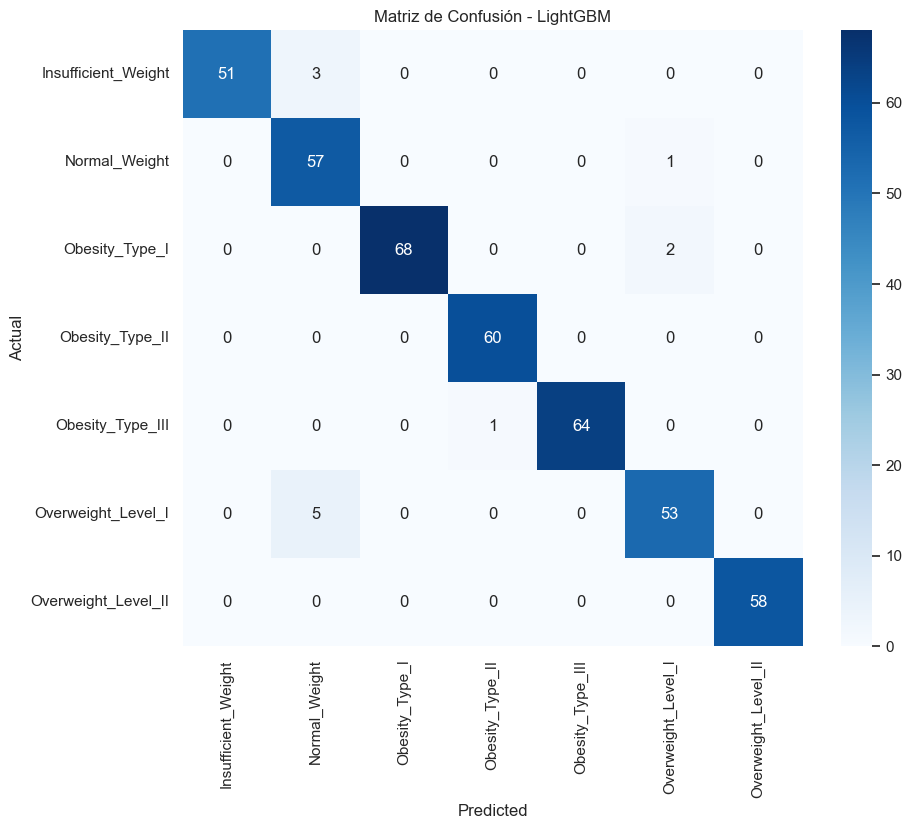

In [32]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = Preprocesamiento["label_encoder"].classes_

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - LightGBM')
plt.yticks(rotation=0)
plt.show()

La matriz de confusión por clase indica que la mayoría de las predicciones son correctas y los errores son mínimos. Comparando con los resultados de validación cruzada, el modelo generaliza muy bien, sin señales de overfitting ni underfitting, lo que lo convierte en el modelo definitivo para predecir la variable NObeyesdad en nuevos datos.

In [33]:
print(classification_report(y_test, y_pred_test, target_names=class_names))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.88      0.98      0.93        58
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.95      0.91      0.93        58
Overweight_Level_II       1.00      1.00      1.00        58

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



Con estos resultados se puede concluir que el modelo LightGBM final presenta un desempeño muy bueno y equilibrado en todas las clases de la variable `NObeyesdad`, con F1-macro y accuracy de 0.97. Las métricas por clase muestran que el modelo identifica correctamente casi todos los casos, con ligeras confusiones en las clases de Normal_Weight, Obesity_Type_II y Overweight_Level_I. Esto indica que el modelo generaliza muy bien y es adecuado para predecir nuevos datos de manera confiable.

In [34]:
df_nuevos = pd.DataFrame({
    "Gender": np.random.choice(["Male", "Female"], 50),
    "Age": np.random.randint(18, 60, 50),
    "Height": np.round(np.random.uniform(1.50, 1.90, 50), 2),
    "Weight": np.round(np.random.uniform(45, 120, 50), 1),
    "family_history_with_overweight": np.random.choice(["yes","no"], 50),
    "FAVC": np.random.choice(["yes","no"], 50),
    "FCVC": np.random.randint(1, 5, 50),
    "NCP": np.random.randint(1, 4, 50),
    "CAEC": np.random.choice(["no","Sometimes","Frequently","Always"], 50),
    "CH2O": np.round(np.random.uniform(1, 3, 50), 1),
    "SCC": np.random.choice(["yes","no"], 50),
    "FAF": np.round(np.random.uniform(0, 5, 50), 1),
    "TUE": np.round(np.random.uniform(0, 2, 50), 1),
    "CALC": np.random.choice(["no","Sometimes","Frequently","Always"], 50),
    "MTRANS": np.random.choice(["Public_Transportation","Automobile","Walking","Bike","Motorbike"], 50)
})

df_nuevos_proc = df_nuevos.copy()

# Agrupar MTRANS
df_nuevos_proc["MTRANS"] = df_nuevos_proc["MTRANS"].replace({
    "Public_Transportation": "Public_Transportation",
    "Automobile": "Automobile",
    "Walking": "Others",
    "Bike": "Others",
    "Motorbike": "Others"
})

# Mapear CAEC y CALC
ordinal_map = {"no":0,"Sometimes":1,"Frequently":2,"Always":2}
for col in ["CAEC","CALC"]:
    df_nuevos_proc[col] = df_nuevos_proc[col].map(ordinal_map)

# Mapear binarias
binary_maps = {
    'family_history_with_overweight': {'no':0, 'yes':1},
    'FAVC': {'no':0, 'yes':1},
    'SCC': {'no':0, 'yes':1},
    'Gender': {'Female':0, 'Male':1}
}

for col, mapping in binary_maps.items():
    df_nuevos_proc[col] = df_nuevos_proc[col].map(mapping)

X_nuevos_t = Preprocesamiento["pipeline"].transform(df_nuevos_proc)
X_nuevos_t = pd.DataFrame(X_nuevos_t, columns=Preprocesamiento["feature_names"])

predicciones_nuevos = best_model.predict(X_nuevos_t)
predicciones_nuevos_labels = Preprocesamiento["label_encoder"].inverse_transform(predicciones_nuevos)

df_nuevos["Predicted_NObeyesdad"] = predicciones_nuevos_labels

In [35]:
df_nuevos.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,Predicted_NObeyesdad
0,Female,28,1.61,105.7,no,no,1,1,no,2.7,no,3.8,1.0,Frequently,Motorbike,Obesity_Type_III
1,Female,18,1.83,70.5,no,no,4,1,Always,2.6,no,3.0,0.1,no,Walking,Normal_Weight
2,Male,59,1.73,54.2,no,no,4,2,Always,1.5,no,4.7,1.7,Always,Bike,Insufficient_Weight
3,Female,50,1.57,65.3,no,no,4,1,Sometimes,1.9,no,2.5,0.2,Always,Bike,Overweight_Level_I
4,Male,45,1.80,67.3,no,yes,3,1,Always,2.1,no,4.4,0.5,Always,Walking,Normal_Weight


In [36]:
# Contar cuántos pacientes predijo el modelo en cada clase
conteo_predicciones = df_nuevos["Predicted_NObeyesdad"].value_counts().reset_index()
conteo_predicciones.columns = ["Clase", "Cantidad"]

# Gráfico de barras interactivo
fig = px.bar(
    conteo_predicciones,
    x="Clase",
    y="Cantidad",
    color="Clase",
    text="Cantidad",
    title="Distribución de Predicciones de NObeyesdad en Nuevos Pacientes",
    labels={"Clase":"Clase Predicha", "Cantidad":"Número de Pacientes"}
)

fig.update_traces(textposition="outside")
fig.show()

Al generar 50 pacientes nuevos y predecir su NObeyesdad con el modelo LightGBM final, se observa que el modelo asigna pacientes a todas las clases de manera coherente. La distribución de predicciones indica que el modelo puede manejar adecuadamente distintos niveles de obesidad y sobrepeso, y no está sesgado hacia una sola categoría. Esto valida cualitativamente el comportamiento del modelo sobre datos nuevos.

### Conclusiones

La comparación de los modelos de clasificación mostró que los algoritmos de boosting, en particular LightGBM_tuned, obtuvieron el mejor desempeño en métricas de precisión, recall y F1-macro, superando consistentemente al resto de los modelos y validando la expectativa inicial de que un modelo de boosting sería la opción más adecuada, dado que el dataset combina variables numéricas, categóricas y ordinales con relaciones no lineales. Además, LightGBM_tuned presentó un tiempo de entrenamiento razonable frente a GradientBoosting_tuned, que logró resultados similares pero con mayor costo computacional.

Los modelos más simples, como Logistic Regression, KNN y NaiveBayes, alcanzaron un desempeño inferior, mientras que RandomForest y SVC tuvieron desempeño intermedio, equilibrando precisión y tiempo de ejecución.

En LightGBM, las variables más influyentes fueron Weight, Height, Age, FCVC, NCP, FAVC y family_history_with_overweight, lo que sugiere que tanto las características físicas como los hábitos alimenticios y antecedentes familiares son determinantes para predecir los niveles de obesidad. En general, LightGBM_tuned combina alta precisión, eficiencia y capacidad de generalización, permitiendo clasificar correctamente tanto las categorías más frecuentes como las menos representadas del dataset.